# BODY FAT PREDICTION

### Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # No direct regression counterpart
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


--------------------

# Reading External dataset

In [8]:
our_data = pd.read_csv('dataset/bodyfat.csv')

In [9]:
our_data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [10]:
our_data.shape

(252, 15)

In [11]:
our_data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


---------------------

In [12]:
our_data.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

-----------------

# Data Pre-processing

### Checking any records in the dataset with (missing values, duplicates, etc) and hadling them.

In [13]:
# Check how many missing values in the dataset
print("The total missing values in this dataset:- " , len(our_data[our_data.isnull().any(axis=1)]))

The total missing values in this dataset:-  0


In [14]:
# Check how many duplicate values in the dataset
print("The total duplicate values in this dataset:- " , our_data.duplicated().sum())

The total duplicate values in this dataset:-  0


In [15]:
# Handling duplicate values if exists
# Dropping all duplicate values from the dataset permanently
df_unique = our_data.drop_duplicates()

-------------------------------

## Checking outliers

In [40]:
# Define a function to detect outliers based on the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return our_data[(our_data[column] < lower_bound) | (our_data[column] > upper_bound)].shape[0]

# Columns to check for outliers
columns_to_check =our_data.select_dtypes(include=[np.number])

# Calculate the number of outliers in each column
outliers_count = {column: detect_outliers_iqr(our_data, column) for column in columns_to_check}
outliers_count


{'Density': 0,
 'BodyFat': 0,
 'Age': 0,
 'Weight': 0,
 'Height': 0,
 'Neck': 0,
 'Chest': 0,
 'Abdomen': 0,
 'Hip': 0,
 'Thigh': 0,
 'Knee': 0,
 'Ankle': 0,
 'Biceps': 0,
 'Forearm': 0,
 'Wrist': 0}

--------------------

## Dropping All Outliers from our dataset 

In [39]:
# Define a function to remove outliers based on the IQR method for a given column
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(our_data[column] >= lower_bound) & (our_data[column] <= upper_bound)]

# Apply the outlier removal for each column individually
our_data = our_data.copy()
for column in columns_to_check:
    our_data = remove_outliers_iqr(our_data, column)

# Check the new shape of the dataset to see how many records remain
our_data.shape

(215, 15)

---------

# Data Visualization

### Displing all numerical varaibles

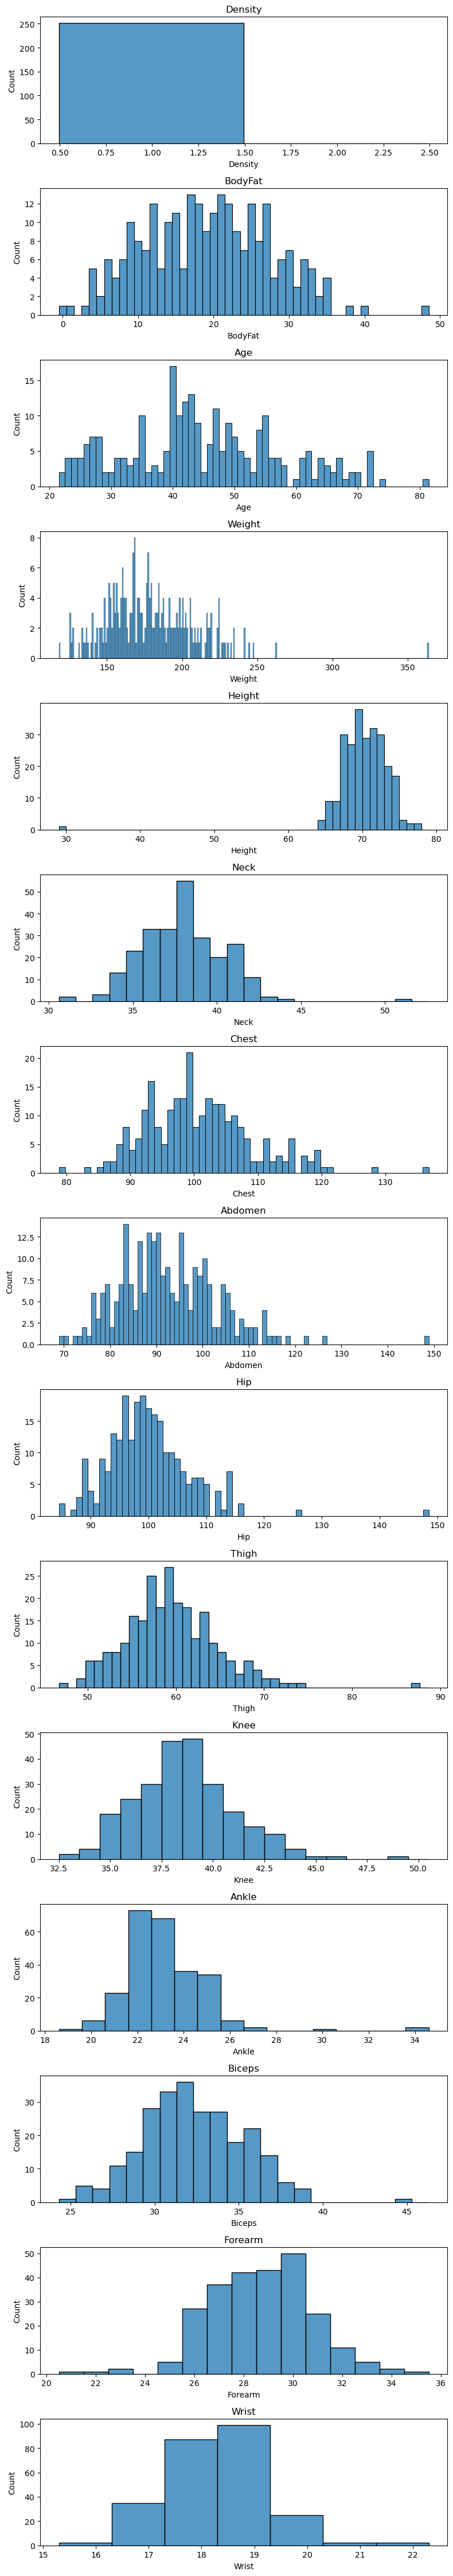

In [17]:
numeric_vars =['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']

fig, axes = plt.subplots(len(numeric_vars), 1, figsize=(8, 3*len(numeric_vars)))  # Increase figsize

for i, predictor in enumerate(numeric_vars):
    sns.histplot(data=our_data, x=predictor, discrete=True, ax=axes[i])
    axes[i].set_title(predictor)

plt.tight_layout()
plt.show()
plt.close()

-----------

# Visualize Correlation of numerical variables

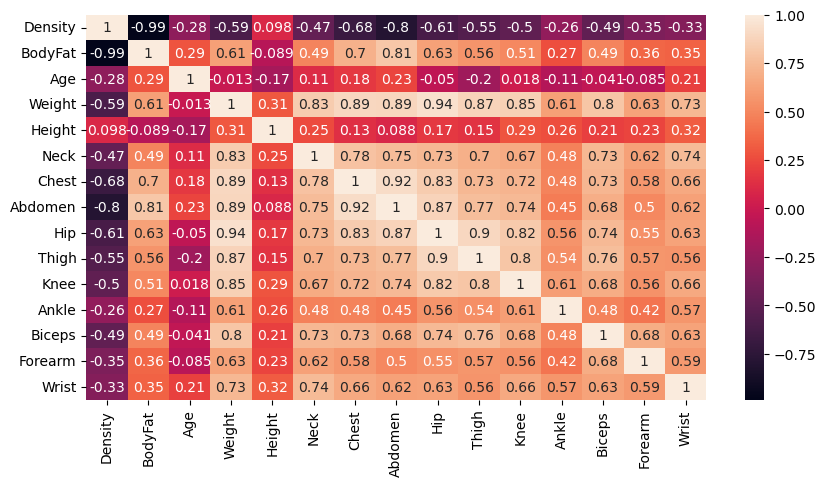

In [18]:
# Select only numeric columns
numeric_columns = our_data.select_dtypes(include=[np.number])

# Plot correlation heatmap for numeric columns
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

----------------

# Building Models

### Splitting features and target

In [41]:
# Splitting features and target
X = our_data.drop('BodyFat', axis=1)  # Features excluding 'BodyFat'
y = our_data['BodyFat']  # Target variable, 'BodyFat'

## Splitting the data into training and testing sets (70% train, 30% test)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##  Define a list of regression modelss to test

In [43]:
# Define a list of regression models to test
regression_models = [
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    LinearRegression(),
    SVR(), 
    Ridge(), 
    Lasso()
]

In [46]:
accuracy_train = {}
reg_model_title = []

for reg_model in regression_models:
    reg_model.fit(X_train, y_train)
    y_pred_train = reg_model.predict(X_train)
    y_pred_test = reg_model.predict(X_test)
    
    accuracy_train[reg_model.__class__.__name__] = reg_model.score(X_train, y_train)
    accuracy_test = reg_model.score(X_test, y_test)
    
    # Calculating evaluation metrics
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    reg_model_title += reg_model.__class__.__name__
    
    
    print(f" {reg_model.__class__.__name__} evaluation: ".center(100, "#"))
    print(f"Accuracy:\n Training: {accuracy_train[reg_model.__class__.__name__]:.3f}\n Testing: {accuracy_test:.3f}")
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"Mean Absolute Error: {mae:.3f}")
    print()

################################# KNeighborsRegressor evaluation: ##################################
Accuracy:
 Training: 0.683
 Testing: 0.420
Mean Squared Error: 27.619
Mean Absolute Error: 4.196

################################ DecisionTreeRegressor evaluation: #################################
Accuracy:
 Training: 1.000
 Testing: 0.957
Mean Squared Error: 2.061
Mean Absolute Error: 0.602

################################ RandomForestRegressor evaluation: #################################
Accuracy:
 Training: 0.994
 Testing: 0.997
Mean Squared Error: 0.153
Mean Absolute Error: 0.261

############################## GradientBoostingRegressor evaluation: ###############################
Accuracy:
 Training: 1.000
 Testing: 0.992
Mean Squared Error: 0.369
Mean Absolute Error: 0.329

################################## AdaBoostRegressor evaluation: ###################################
Accuracy:
 Training: 0.987
 Testing: 0.968
Mean Squared Error: 1.536
Mean Absolute Error: 0.903

#########

## Visualize the model and save in visualizations folder

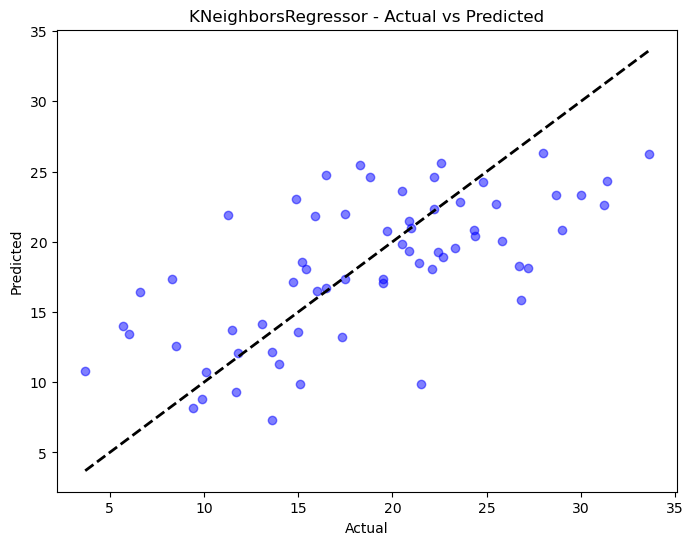

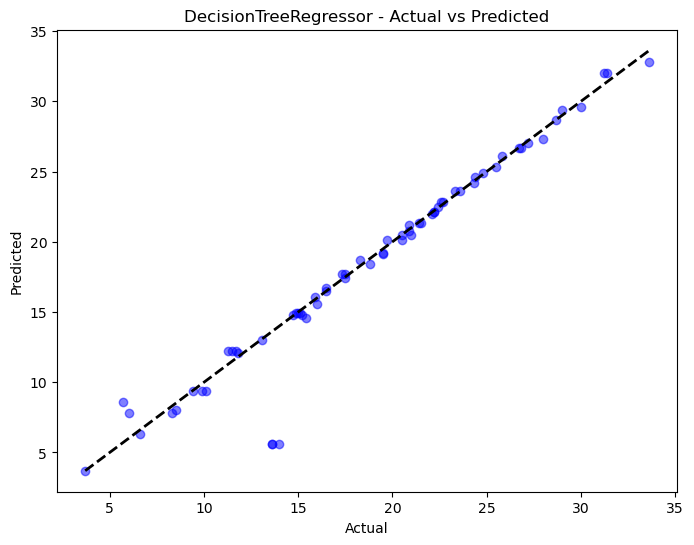

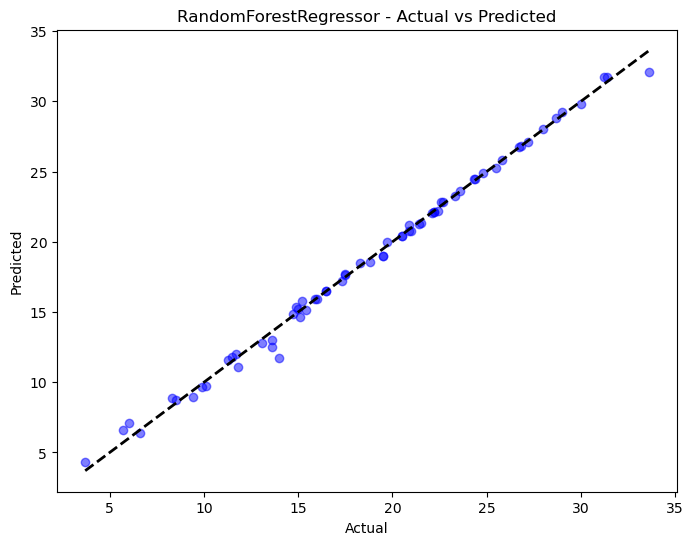

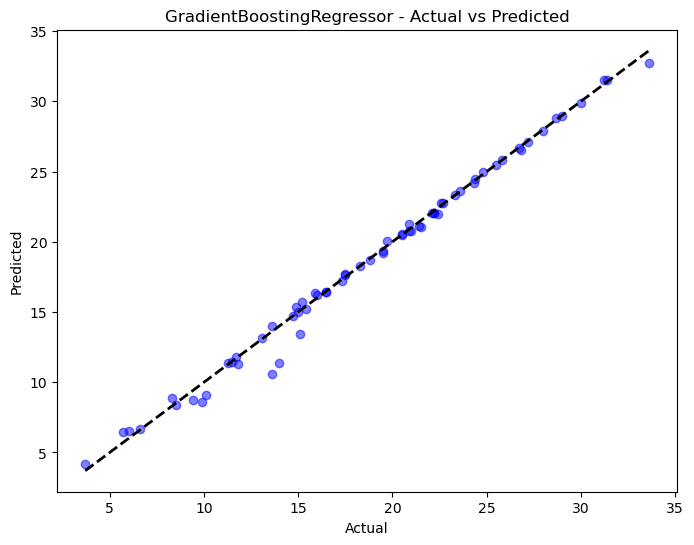

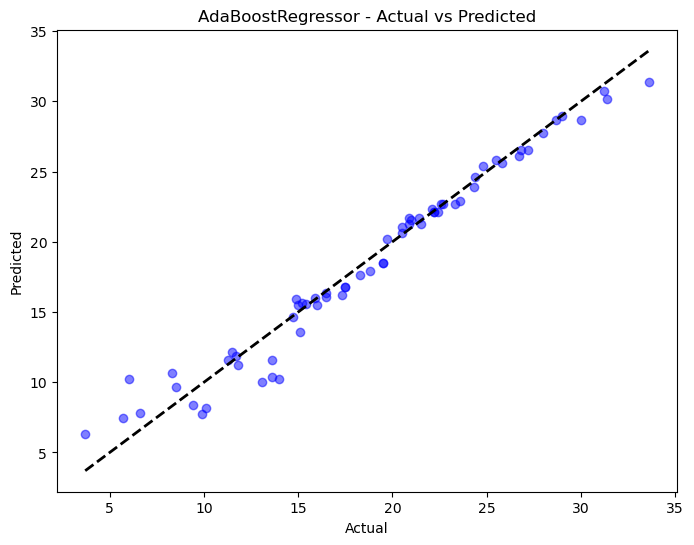

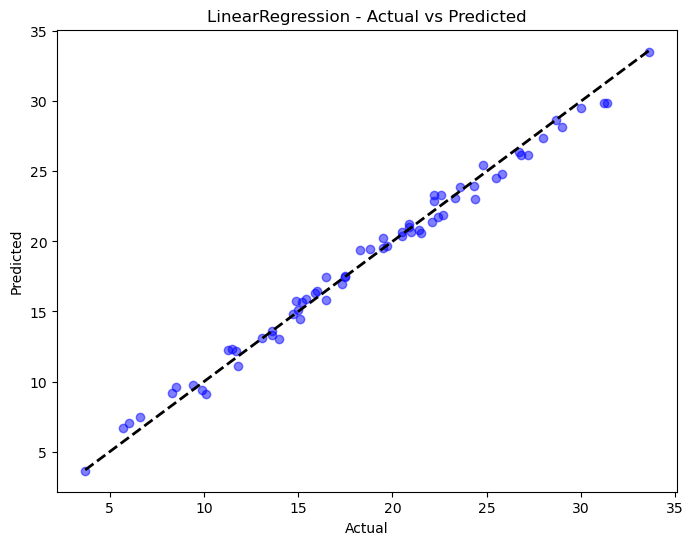

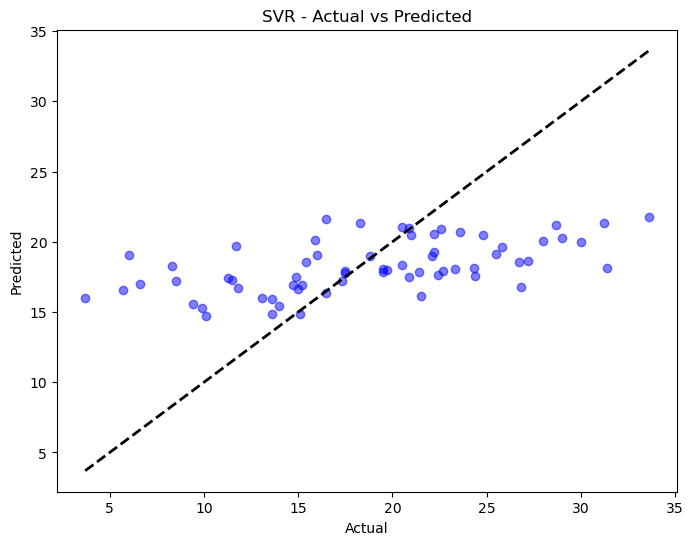

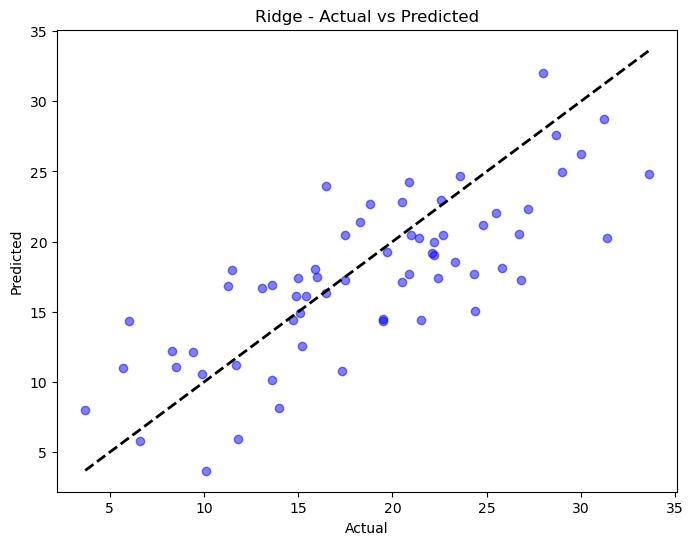

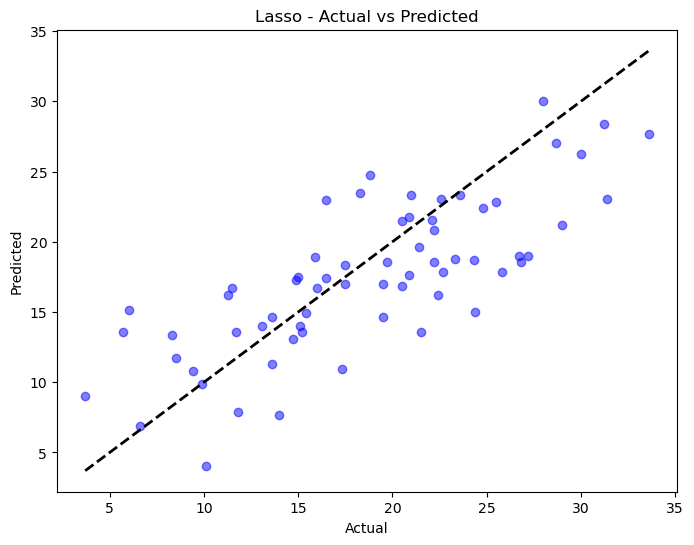

Plots saved successfully!


In [29]:
# Ensure the directory exists, if not create it
directory = "visualizations"
if not os.path.exists(directory):
    os.makedirs(directory)

reg_model_titles = [reg_model.__class__.__name__ for reg_model in regression_models]

for reg_model, reg_model_title in zip(regression_models, reg_model_titles):
    reg_model.fit(X_train, y_train)
    y_pred_test = reg_model.predict(X_test)
    
    # Plotting predicted vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{reg_model_title} - Actual vs Predicted')
    
    # Save the plot as an image
    plt.savefig(os.path.join(directory, f'{reg_model_title}_plot.png'))
    
    plt.show()

print("Plots saved successfully!")


----------

# model selection & saving

In [47]:
# Train the Random Forest model
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Save the trained model to a file
file_path = "model/random_forest_model.joblib"
dump(random_forest, file_path)
print("Random Forest model saved successfully!")

Random Forest model saved successfully!


----------

# Input Model Tesing

In [48]:
X.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [56]:
# Features
feature_test = np.array([[1.0708, 23,154.25, 67.75, 36.2, 93.1, 85.2, 94.5, 59.0, 37.3, 21.9, 32.0, 27.4, 17.1]])
result = random_forest.predict(feature_test)
print(round(result[0],2))
print("==========================================================")

12.3


In [50]:
our_data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.0641,15.2,68,155.50,69.25,36.3,97.4,84.3,94.4,54.3,37.5,22.6,29.2,27.3,18.5
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0


----------

# The End